In [1]:
# create spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/05 17:22:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/05 17:22:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# Load the flight dataset
src = '/Users/fengzheng/Desktop/Coding/Practice/CS5540Project/data_clean/flight_clean.csv'
flight_df = spark.read.load(src, format='csv', inferSchema=True, header=True)
flight_df.printSchema()
flight_df.show(5)

root
 |-- Date: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestStateName: string (nullable = true)

+-------------------+--------------------+------+----+---------+---------------+-------------+
|               Date|             Airline|Origin|Dest|Cancelled|OriginStateName|DestStateName|
+-------------------+--------------------+------+----+---------+---------------+-------------+
|2019-01-01 00:00:00|SkyWest Airlines ...|   DFW| LAW|    false|          Texas|     Oklahoma|
|2019-01-01 00:00:00|       Allegiant Air|   AVL| FLL|    false| North Carolina|      Florida|
|2019-01-01 00:00:00|ExpressJet Airlin...|   LFT| IAH|    false|      Louisiana|        Texas|
|2019-01-01 00:00:00|SkyWest Airlines ...|   LAW| DFW|    false|       Oklahoma|        Texas|
|2019-01-01 00:00:00|       Allegiant Air| 

/Users/fengzheng/Desktop/Coding/Practice/venv/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


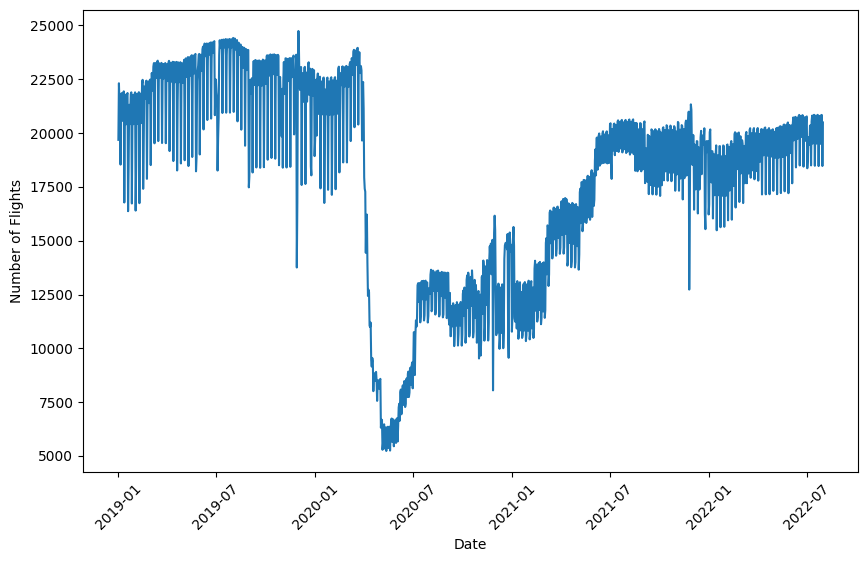

In [4]:
# Find flight count by date
from pyspark.sql.functions import *
flight_count = flight_df.groupBy('Date')\
                        .agg(count('Airline').alias('flight_count'))\
                        .sort('Date').toPandas()
flight_count

# Plot
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 6))
plt.plot(flight_count['Date'], flight_count['flight_count'])
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()